<a href="https://colab.research.google.com/github/rujeetjahagirdar/DM_Assignment1_Classification-/blob/master/playground3_BASIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
from torchvision import datasets,transforms,io
from torch import utils
from collections import Counter

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


331

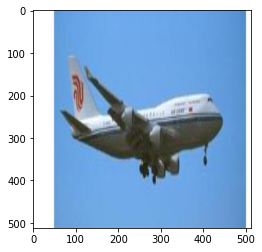

In [18]:
transform = transforms.Compose([transforms.Resize((512,512)),transforms.ToTensor()])
dataset = datasets.ImageFolder('/content/drive/MyDrive/Colab Notebooks/archive/caltech101_classification/',transform=transform)
trainData,validationData,testData = utils.data.random_split(dataset,[930,400,331],generator=torch.Generator().manual_seed(42))
plt.imshow(trainData[230][0].permute(1,2,0))
trainDataLoader = torch.utils.data.DataLoader(trainData, batch_size=32, shuffle=True)
validationDataLoder = torch.utils.data.DataLoader(validationData, batch_size=32, shuffle=True)
testDataLoader = torch.utils.data.DataLoader(testData, batch_size=32, shuffle=True)
len(testDataLoader.dataset)

In [4]:
class CNN2(torch.nn.Module):

    def __init__(self):
        super(CNN2, self).__init__()
        ###############################
        # Original Input image: (224,224,3)
        # Conv : (224,224,16)
        # Pool: (112,112,16)
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
        )
        ########################################
        # Input Image: (112,112,16)
        # Conv: (112,112,64)
        # Pool: (56,56,64)
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(16, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
        )
        ############################################
        # FC 28*28*128 -> 625
        self.fc1 = torch.nn.Linear(128*128 * 64, 3, bias=True) # size of image input to this layer * 128
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        self.layer4 = torch.nn.Sequential(
            self.fc1,
            torch.nn.ReLU()
        )

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)   # Flatten them for FC
        out = self.fc1(out)
        return out


#instantiate CNN model
model = CNN2()
model

CNN2(
  (layer1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=1048576, out_features=3, bias=True)
  (layer4): Sequential(
    (0): Linear(in_features=1048576, out_features=3, bias=True)
    (1): ReLU()
  )
)

In [37]:
import torch.optim as optim

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

no_of_epochos = 3
for epoch in range(no_of_epochos):
    running_loss = 0.0
    for i,data in enumerate(trainDataLoader):
      if(i%10==0):
        print("i=",i)
      inputData , lable = data
      optimizer.zero_grad()
      output = model(inputData)
      loss = criterion(output,lable)
      loss.backward()
      optimizer.step()
      running_loss = running_loss+loss.item()
      if i % 5 == 0:    # print every 2000 mini-batches
        print('Epoch={} Batch={} Loss= {}'.format(epoch + 1, i + 1, running_loss / 2000))
        running_loss = 0.0
print("####Finished Training######")

i= 0
Epoch=1 Batch=1 Loss= 2.2728074342012404e-05
Epoch=1 Batch=6 Loss= 0.00012637333758175372
i= 10
Epoch=1 Batch=11 Loss= 0.00018994845077395438
Epoch=1 Batch=16 Loss= 7.099432311952113e-05
i= 20
Epoch=1 Batch=21 Loss= 0.0001291663721203804
Epoch=1 Batch=26 Loss= 0.00024249219335615636
i= 0
Epoch=2 Batch=1 Loss= 3.6013443022966384e-05
Epoch=2 Batch=6 Loss= 0.00018087391555309296
i= 10
Epoch=2 Batch=11 Loss= 0.0002145330123603344
Epoch=2 Batch=16 Loss= 0.00023870978923514486
i= 20
Epoch=2 Batch=21 Loss= 0.0002473224606364965
Epoch=2 Batch=26 Loss= 0.00044618293829262257
i= 0
Epoch=3 Batch=1 Loss= 2.579532004892826e-05
Epoch=3 Batch=6 Loss= 0.00018843276239931584
i= 10
Epoch=3 Batch=11 Loss= 7.667041197419167e-05
Epoch=3 Batch=16 Loss= 0.00016930807661265135
i= 20
Epoch=3 Batch=21 Loss= 0.00013401781767606735
Epoch=3 Batch=26 Loss= 0.00016720102727413178
####Finished Training######


In [39]:
correct = 0
total = 0
with torch.no_grad():
    for data in testDataLoader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total = total + labels.size(0)
        correct = correct + (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 95 %
